In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install tensorflow

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
import os
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
train_data_dir='/kaggle/input/fer2013/train'
validation_data_dir='/kaggle/input/fer2013/test'

In [8]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [11]:
img, label = train_generator.__next__()

In [14]:
model = Sequential()

model.add(Input(shape=(48,48,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [16]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [21]:
train_path = "/kaggle/input/fer2013/train"
test_path = "/kaggle/input/fer2013/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)

28709
7178


In [22]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=10,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

Epoch 1/10
897/897 [==============================] - 246s 272ms/step - loss: 1.7799 - accuracy: 0.2654 - val_loss: 1.7199 - val_accuracy: 0.3075
Epoch 2/10
897/897 [==============================] - 214s 239ms/step - loss: 1.6819 - accuracy: 0.3257 - val_loss: 1.5065 - val_accuracy: 0.4216
Epoch 3/10
897/897 [==============================] - 211s 235ms/step - loss: 1.5551 - accuracy: 0.3940 - val_loss: 1.4017 - val_accuracy: 0.4552
Epoch 4/10
897/897 [==============================] - 217s 242ms/step - loss: 1.4609 - accuracy: 0.4337 - val_loss: 1.3116 - val_accuracy: 0.5018
Epoch 5/10
897/897 [==============================] - 211s 236ms/step - loss: 1.4012 - accuracy: 0.4603 - val_loss: 1.2580 - val_accuracy: 0.5158
Epoch 6/10
897/897 [==============================] - 209s 233ms/step - loss: 1.3565 - accuracy: 0.4779 - val_loss: 1.2353 - val_accuracy: 0.5349
Epoch 7/10
897/897 [==============================] - 210s 235ms/step - loss: 1.3307 - accuracy: 0.4911 - val_loss: 1.2134 -

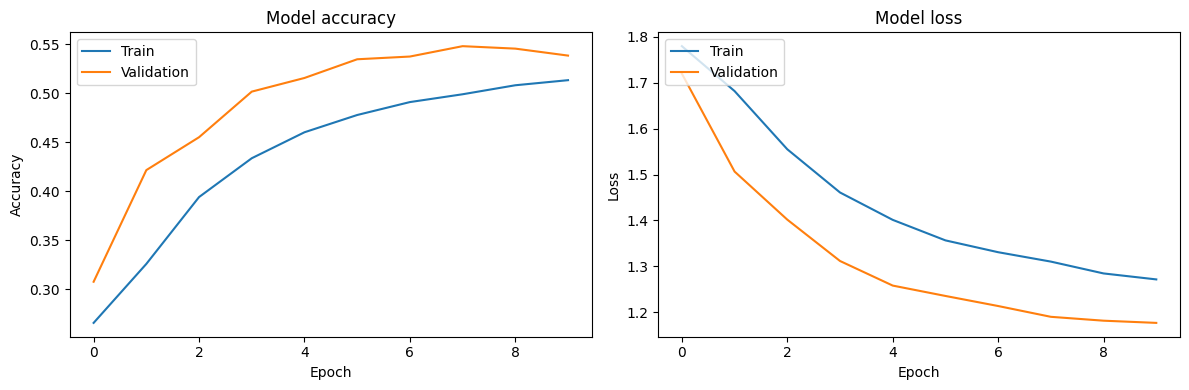

In [23]:
# Plotting the learning curve
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#**Model Evaluation**


In [24]:
validation_steps = num_test_imgs // 32
eval_result = model.evaluate(validation_generator, steps=validation_steps)
print(f"Validation Loss: {eval_result[0]}")
print(f"Validation Accuracy: {eval_result[1]}")

224/224 [==============================] - 13s 58ms/step - loss: 1.1771 - accuracy: 0.5384
Validation Loss: 1.1771239042282104
Validation Accuracy: 0.5383649468421936


In [25]:
# Predict the labels for validation data
Y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred = np.argmax(Y_pred, axis=1)

224/224 [==============================] - 13s 58ms/step


In [27]:
# True labels
y_true = validation_generator.classes[:len(y_pred)]

In [28]:
from sklearn.metrics import classification_report
# Classification Report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report
              precision    recall  f1-score   support

       Angry       0.13      0.13      0.13       958
     Disgust       0.00      0.00      0.00       111
        Fear       0.15      0.12      0.13      1024
       Happy       0.25      0.29      0.27      1774
     Neutral       0.19      0.26      0.22      1233
         Sad       0.18      0.11      0.13      1247
    Surprise       0.11      0.13      0.12       821

    accuracy                           0.18      7168
   macro avg       0.14      0.15      0.14      7168
weighted avg       0.18      0.18      0.18      7168



In [29]:
# Confusion Matrix
print('Confusion Matrix')
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

Confusion Matrix
[[120   0 104 291 228  83 132]
 [ 14   0  12  33  35   9   8]
 [124   1 119 290 223 111 156]
 [222   3 195 512 427 179 236]
 [149   3 139 314 323 125 180]
 [172   3 128 342 298 132 172]
 [100   2  99 255 183  76 106]]


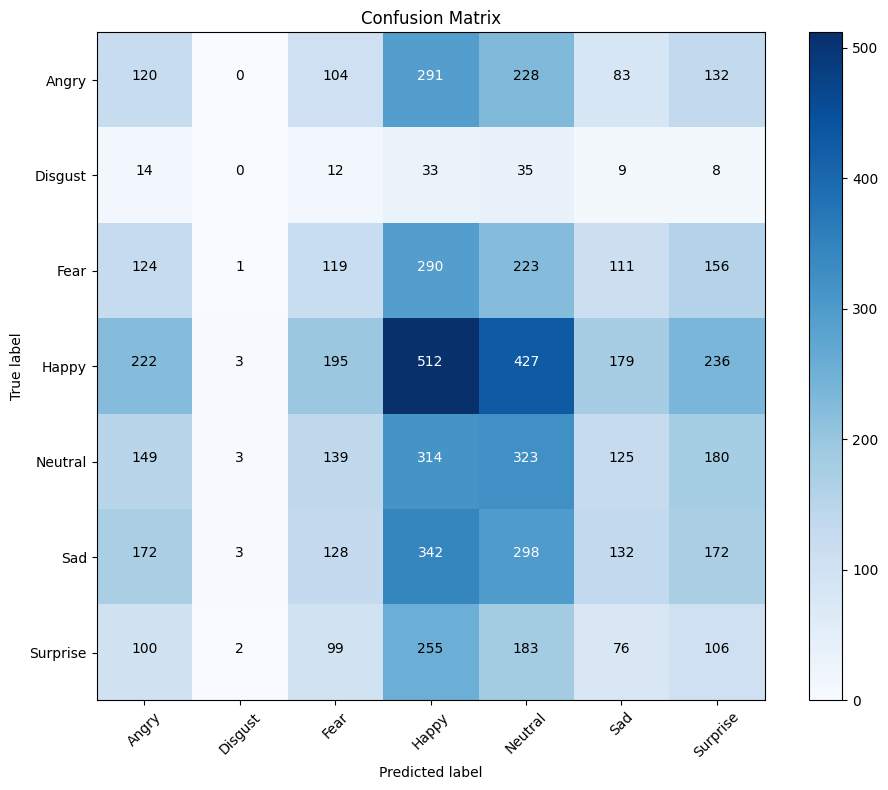

In [30]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [32]:
model.save('/kaggle/working/model_file_10.h5')

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)